In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf


In [144]:
ls = np.array([1,2,3])
print(ls)

[1 2 3]


In [145]:
#Kliment's Cell





In [146]:
#123
cnbc_data = pd.read_csv('dataset/cnbc_headlines.csv')
guardian_data = pd.read_csv('dataset/guardian_headlines.csv')
reuters_data = pd.read_csv('dataset/reuters_headlines.csv')

In [147]:
cnbc_data

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [148]:
guardian_data

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [149]:
reuters_data

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [150]:
# Basic info for all three news headlines datasets
cnbc_info = cnbc_data.info()
guardian_info = guardian_data.info()
reuters_info = reuters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usag

In [151]:
cnbc_missing = cnbc_data.isnull().mean()
guardian_missing = guardian_data.isnull().mean()
reuters_missing = reuters_data.isnull().mean()

cnbc_missing, guardian_missing, reuters_missing

(Headlines      0.090909
 Time           0.090909
 Description    0.090909
 dtype: float64,
 Time         0.0
 Headlines    0.0
 dtype: float64,
 Headlines      0.0
 Time           0.0
 Description    0.0
 dtype: float64)

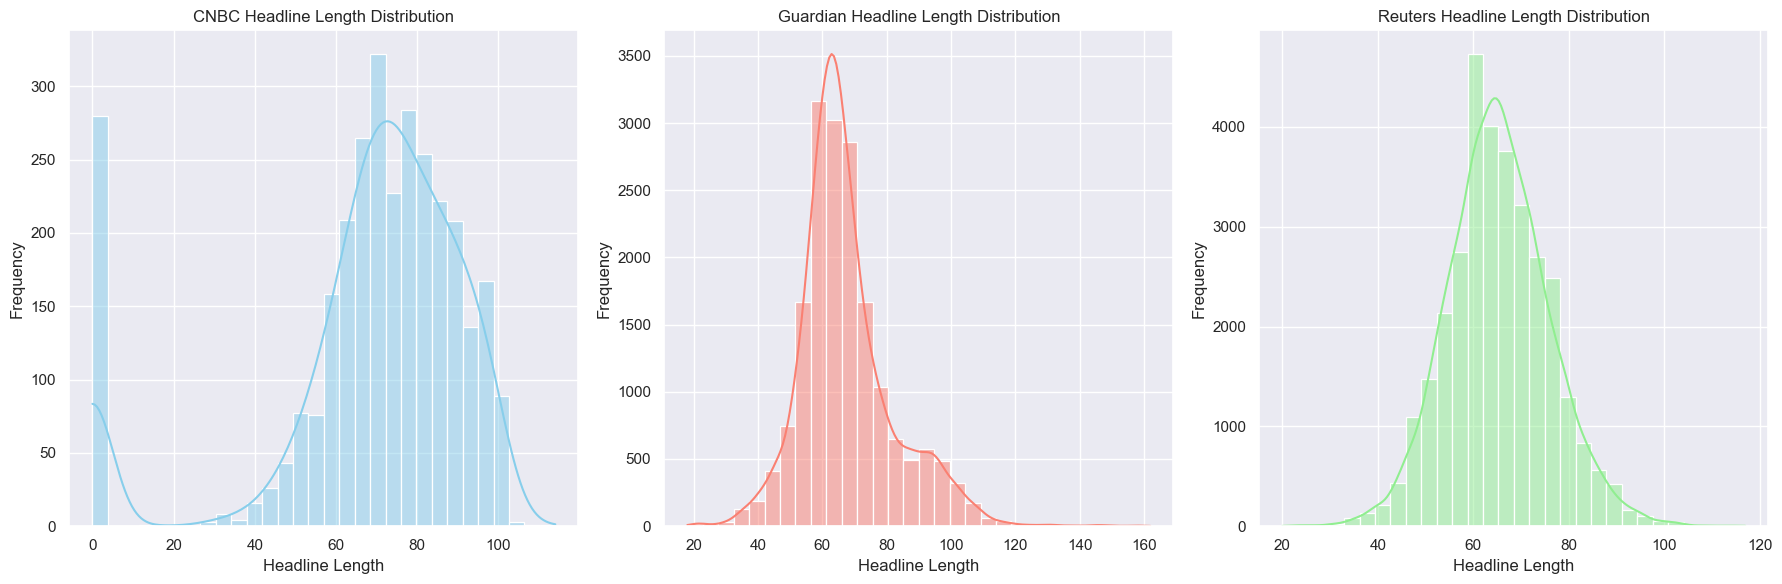

In [156]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# CNBC dataset
sns.histplot(cnbc_data['Headlines'].fillna("").apply(len), bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("CNBC Headline Length Distribution")
ax[0].set_xlabel("Headline Length")
ax[0].set_ylabel("Frequency")

# Guardian dataset
sns.histplot(guardian_data['Headlines'].fillna("").apply(len), bins=30, kde=True, ax=ax[1], color="salmon")
ax[1].set_title("Guardian Headline Length Distribution")
ax[1].set_xlabel("Headline Length")
ax[1].set_ylabel("Frequency")

# Reuters dataset
sns.histplot(reuters_data['Headlines'].fillna("").apply(len), bins=30, kde=True, ax=ax[2], color="lightgreen")
ax[2].set_title("Reuters Headline Length Distribution")
ax[2].set_xlabel("Headline Length")
ax[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [164]:
# Convert the 'Time' columns to datetime format for each dataset
cnbc_data['Time'] = pd.to_datetime(cnbc_data['Time'], errors='coerce')
guardian_data['Time'] = pd.to_datetime(guardian_data['Time'], errors='coerce')
reuters_data['Time'] = pd.to_datetime(reuters_data['Time'], errors='coerce')

# Adding additional columns for time analysis
for df in [cnbc_data, guardian_data, reuters_data]:
    # Extract date parts for time-based analysis
    df['Year'] = df['Time'].dt.year
    df['Month'] = df['Time'].dt.month
    df['Day'] = df['Time'].dt.dayofweek 
    df['Hour'] = df['Time'].dt.hour

# Frequency of headlines by year and month for each dataset
cnbc_yearly_counts = cnbc_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)
guardian_yearly_counts = guardian_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)
reuters_yearly_counts = reuters_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)


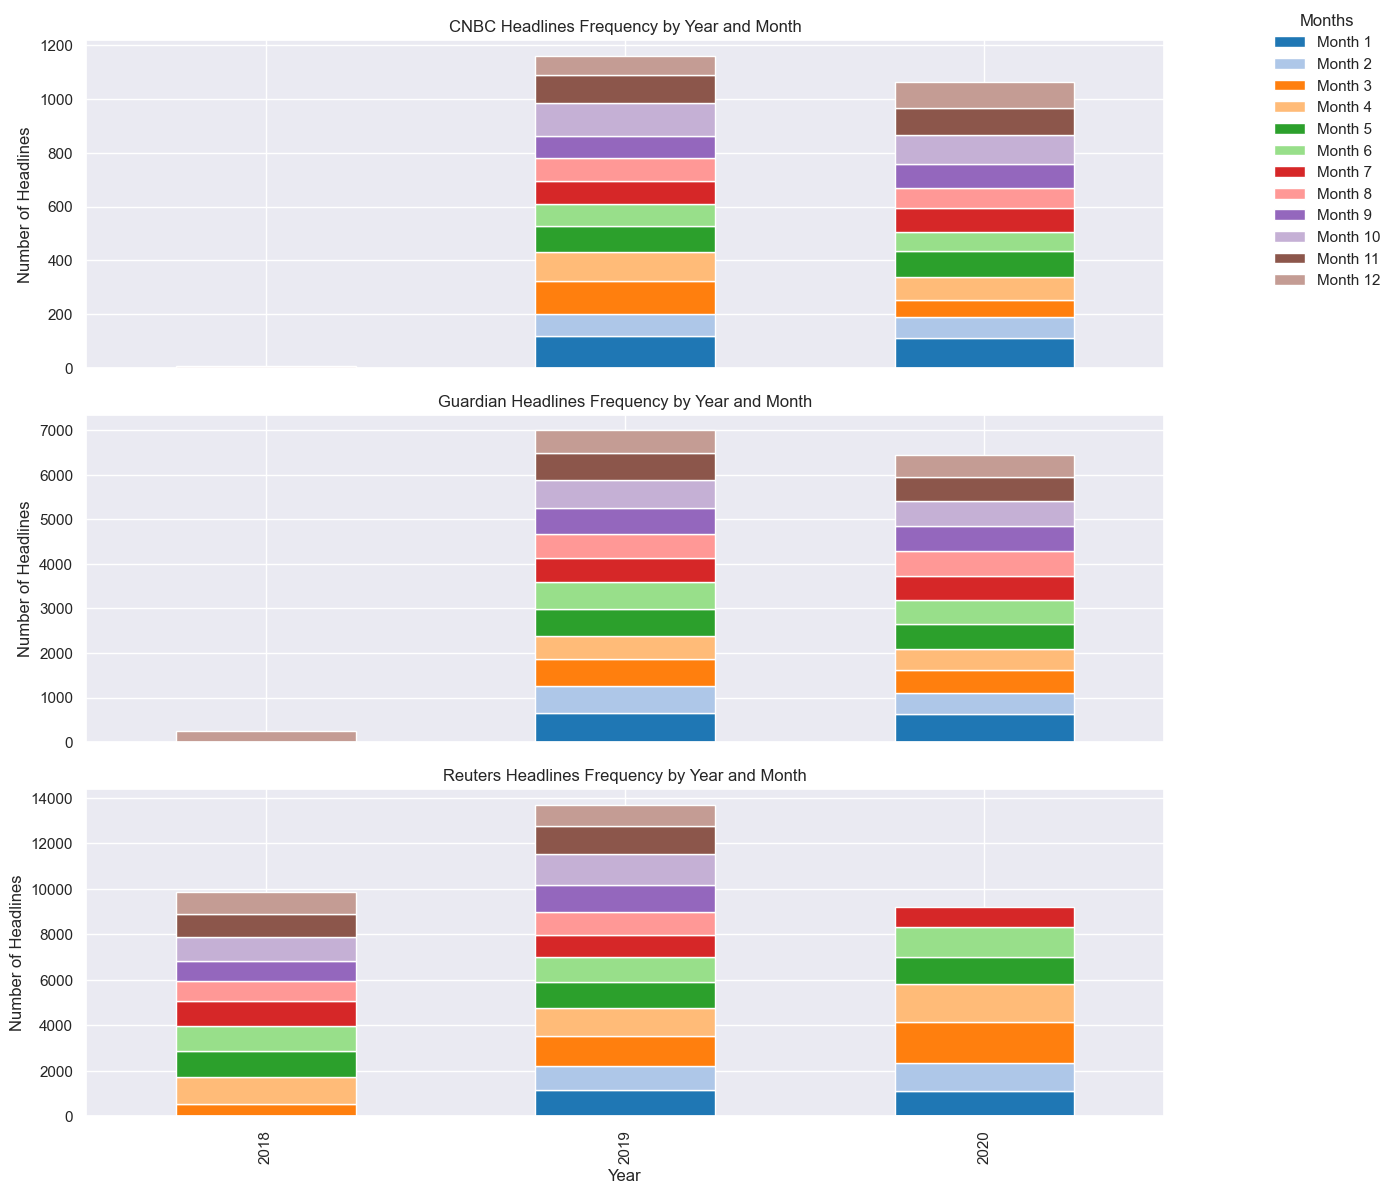

In [165]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Set a colormap to represent months consistently
month_colors = plt.colormaps["tab20"]

# CNBC dataset with month colors
cnbc_yearly_counts.plot(kind="bar", stacked=True, ax=ax[0], color=[month_colors(i) for i in range(12)], legend=False)
ax[0].set_title("CNBC Headlines Frequency by Year and Month")
ax[0].set_ylabel("Number of Headlines")

# Guardian dataset with month colors
guardian_yearly_counts.plot(kind="bar", stacked=True, ax=ax[1], color=[month_colors(i) for i in range(12)], legend=False)
ax[1].set_title("Guardian Headlines Frequency by Year and Month")
ax[1].set_ylabel("Number of Headlines")

# Reuters dataset with month colors
reuters_yearly_counts.plot(kind="bar", stacked=True, ax=ax[2], color=[month_colors(i) for i in range(12)], legend=False)
ax[2].set_title("Reuters Headlines Frequency by Year and Month")
ax[2].set_ylabel("Number of Headlines")
ax[2].set_xlabel("Year")

# Adding a single legend for the months
fig.legend([f"Month {i}" for i in range(1, 13)], loc="upper right", title="Months")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
plt.show()


## Stock Price of the S&P 500

In [135]:
ticker = "^GSPC"
start_date = "2017-12-01"
end_date = "2020-07-31"


data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
data_hlcv = data[['High', 'Low', 'Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [136]:
data_hlcv.head()

Price,High,Low,Close,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,
2017-12-01 00:00:00+00:00,2650.620117,2605.520020,2642.219971,3950930000
2017-12-04 00:00:00+00:00,2665.189941,2639.030029,2639.439941,4025840000
2017-12-05 00:00:00+00:00,2648.719971,2627.729980,2629.570068,3547570000
2017-12-06 00:00:00+00:00,2634.409912,2624.750000,2629.270020,3253080000
2017-12-07 00:00:00+00:00,2640.989990,2626.530029,2636.979980,3297060000


### Data Exploration

In [137]:
data_hlcv.describe()

Price,High,Low,Close,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC
count,669.000000,669.000000,669.000000,6.690000e+02
mean,2883.568308,2849.033738,2867.277964,3.965081e+09
std,198.117998,206.057495,202.285824,1.154337e+09
min,2300.729980,2191.860107,2237.399902,1.296530e+09
25%,2739.189941,2709.540039,2724.439941,3.300220e+09
50%,2856.669922,2825.389893,2843.489990,3.635780e+09
75%,2999.149902,2970.090088,2984.870117,4.156640e+09
max,3393.520020,3378.830078,3386.149902,9.053950e+09


In [138]:
missing_values = data_hlcv.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Price   Ticker
High    ^GSPC     0
Low     ^GSPC     0
Close   ^GSPC     0
Volume  ^GSPC     0
dtype: int64


The S&P 500 dataset from December 1, 2017, to July 31, 2020, contains **669** daily records with columns for `High`, `Low`, `Close`, and `Volume`, with **no missing values**. The average 'High', 'Low', and 'Close' prices are around 2883, 2849, and 2867, respectively, with standard deviations near 200 points, indicating moderate volatility. The 'Volume' data, averaging 3.97 billion shares, shows considerable variability, ranging from 1.3 billion to 9.05 billion, reflecting spikes in trading activity during certain market events.

To prepare for analysis, normalization or standardization may be beneficial to handle the scale differences, particularly between price and volume data. This initial overview confirms a relatively stable daily distribution, setting up further analysis on trends, volatility, and potential event impacts on S&P 500 performance.

### Close Price over Time

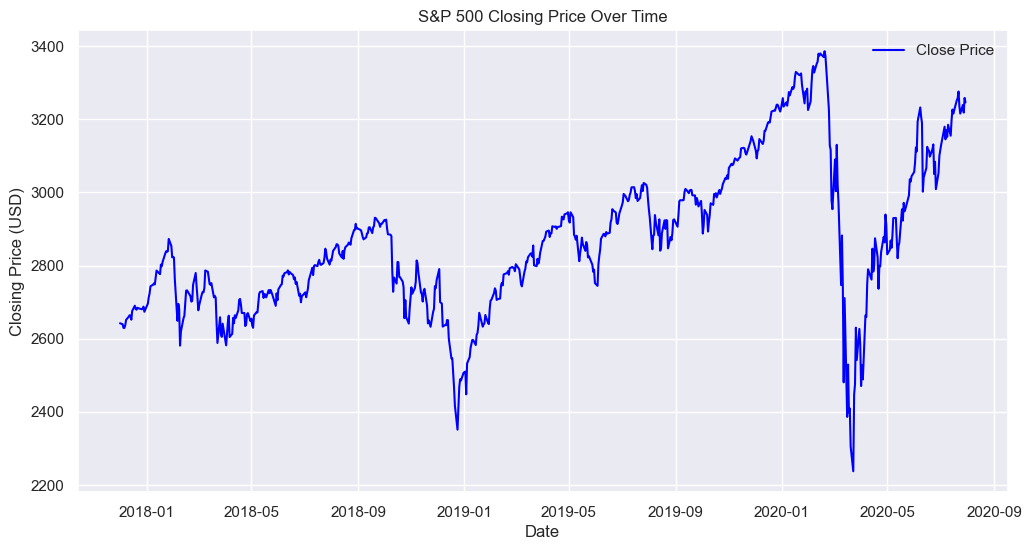

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=data_hlcv.index, y=data_hlcv['Close'].squeeze(), color='blue', label="Close Price")
plt.title("S&P 500 Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()


## News Headlines

In [140]:
df_gurdian = pd.read_csv('dataset/guardian_headlines.csv')
df_gurdian 

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


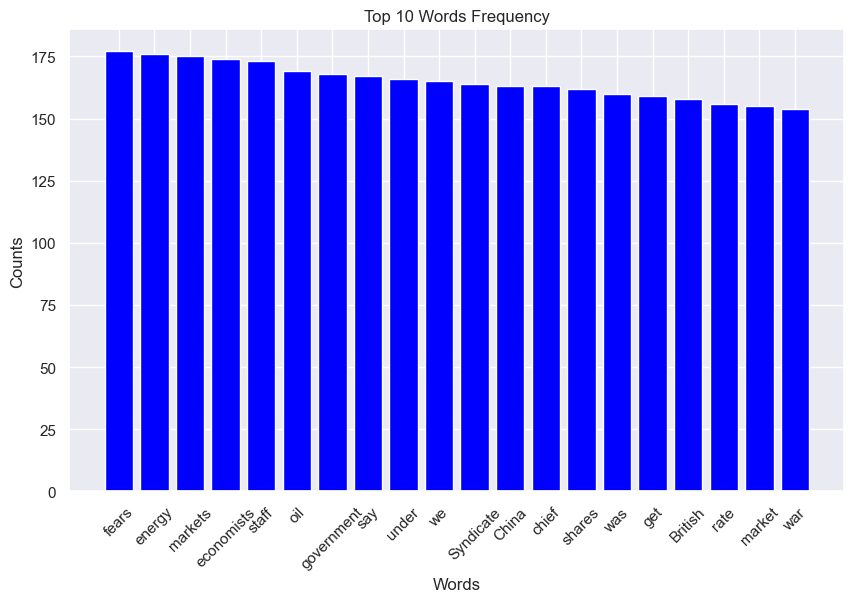

In [141]:
gurdian_string = [i for i in guardian_data['Headlines']]
gurdian_string

gudian_string = ''
for i in guardian_data['Headlines']:
    gudian_string += i
gurdian_sting_list = gudian_string.split(' ')

gurdian_count = {}

for i in gurdian_sting_list:
    if i in gurdian_count.keys():
        gurdian_count[i] += 1
    else:
        gurdian_count[i] = 1

sorted_words = sorted(gurdian_count.items(), key=lambda item: item[1], reverse=True)
top_words = sorted_words[100:120]  # Select the top 10 words

# Step 2: Create lists of words and their counts
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Step 3: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue')  # Create a bar chart
plt.xlabel('Words')  # Label on X axis
plt.ylabel('Counts')  # Label on Y axis
plt.title('Top 10 Words Frequency')  # Title of the histogram
plt.xticks(rotation=45)  # Rotate the words on x-axis for better visibility
plt.show()  # Display the plot

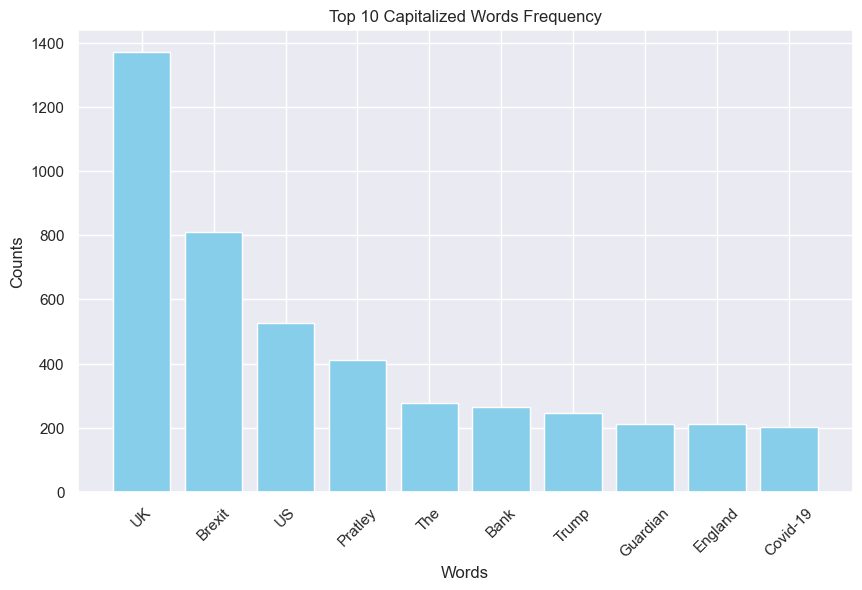

In [142]:
filtered_words = {word: count for word, count in gurdian_count.items() if any(c.isupper() for c in word)}

# Step 2: Sort the dictionary by count in descending order and select the top ten
top_words = sorted(filtered_words.items(), key=lambda item: item[1], reverse=True)[:10]

# Separate the words and their counts for plotting
words, counts = zip(*top_words)

# Step 3: Plotting the histogram (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 10 Capitalized Words Frequency')
plt.xticks(rotation=45)  # Rotate the words on x-axis for better visibility
plt.show()